# **Titanic Survival Prediction**

----------------
## **Context** 
----------------
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

------------------
## **Objective**
------------------

The objective of this problem is to build a predictive model that answers the question: “**what sorts of people were more likely to survive?**” using the passenger data (i.e., name, age, gender, socio-economic class, etc.).

--------------------------
## **Data Dictionary**
--------------------------

- **survival** - If passenger will survive or not (Yes - 1, No - 0).
- **pclass** - Ticket class (1st, 2nd, and 3rd).
- **sex** - Sex of the passenger (M / F).
- **Age** - Age in years.
- **sibsp** - The number of siblings / spouses aboard the Titanic.
- **parch** - The number of parents / children aboard the Titanic.
- **ticket** - Ticket number.
- **fare** - Passenger fare.
- **cabin** - Cabin number.
- **embarked** - Port of embarkation.

Original Dataset: <a href="https://www.kaggle.com/c/titanic">Click Here</a>

## **Importing necessary libraries**

In [ ]:
# Import necessary libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')

import seaborn as sns

from sklearn import tree

# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall

    precision = precision_score(target, pred, average = 'macro')              # To compute precision

    acc = accuracy_score(target, pred)                                 # To compute accuracy score


    # Creating a dataframe of metrics

    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },

        index = [0],
    )

    return df_perf

## **Loading the dataset**

In [ ]:
titanic_df = pd.read_csv("train.csv")

## **Checking the info of the dataset**

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observations:**

- There are **891 rows and 12 columns** in the data.
- The columns Age, Cabin, and Embarked have **missing values**.
- There are some columns like 'PassengerId', 'Name', 'Ticket', 'Cabin', and 'Fare' (correlates with class) which wouldn't add anything to the model. So we **drop these columns**.

In [ ]:
titanic_df.describe(
)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


38% survived

## **Data Preprocessing**

In [ ]:
# Filling missing values in the Age column using the median of the Age column
titanic_df = titanic_df.fillna(titanic_df.median())

# Filling missing values in the Embarked column using the mode of the column, i.e., 'S'
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

# Creating a new column
titanic_df['FamilySize'] = titanic_df['Parch'] + titanic_df['SibSp']

# Dropping un-necessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Fare'], axis = 1, inplace = True)

# Replacing the initials in the Embarked column with the full name
titanic_df.loc[titanic_df['Embarked'] == 'C', 'Embarked'] = 'Cherbourg'

titanic_df.loc[titanic_df['Embarked'] == 'S', 'Embarked'] = 'Southampton'

titanic_df.loc[titanic_df['Embarked'] == 'Q', 'Embarked'] = 'Queenstown'

# Binning the Age column
bins = [0, 13, 25, 40, 65, np.inf]

names = ['<13', '13-25', '25-40', '40-65', '65+']

titanic_df['Age'] = pd.cut(titanic_df['Age'], bins, labels = names)

# Printing 10 observations
titanic_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,FamilySize
598,0,3,male,25-40,0,0,NaN,Cherbourg,0
194,1,1,female,40-65,0,0,B4,Cherbourg,0
735,0,3,male,25-40,0,0,NaN,Southampton,0
106,1,3,female,13-25,0,0,NaN,Southampton,0
570,1,2,male,40-65,0,0,NaN,Southampton,0
580,1,2,female,13-25,1,1,NaN,Southampton,2
30,0,1,male,25-40,0,0,NaN,Cherbourg,0
888,0,3,female,25-40,1,2,NaN,Southampton,3
643,1,3,male,25-40,0,0,NaN,Southampton,0
749,0,3,male,25-40,0,0,NaN,Queenstown,0


In [ ]:
titanic_df.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
# Encoding the categorical columns
titanic_df.Sex = pd.factorize(titanic_df.Sex)[0]

titanic_df.Embarked = pd.factorize(titanic_df.Embarked)[0]

titanic_df.Age = pd.factorize(titanic_df.Age)[0]

titanic_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize
838,1,3,0,1,0,0,0,0
804,1,3,0,1,0,0,0,0
812,0,2,0,1,0,0,0,0
775,0,3,0,0,0,0,0,0
364,0,3,0,1,1,0,2,1
600,1,2,1,0,2,1,0,3
634,0,3,1,3,3,2,0,5
728,0,2,0,0,1,0,0,1
315,1,3,1,1,0,0,0,0
885,0,3,1,1,0,5,2,5


Extracting samples from the original data to create the train data (80%) and the test data (20%).

## **Splitting the dataset**

In [ ]:
pcnt = .8

# Random state is a seed value
train = titanic_df.sample(frac = pcnt, random_state = 14)

test = titanic_df.drop(train.index)

# Create train and test datasets

X_train = train[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize', 'Parch', 'SibSp']]

X_test = test[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize', 'Parch', 'SibSp']]

y_train = train['Survived']

y_test = test['Survived']

np.random.seed(0)


In [ ]:
X_train.Age

75     0
602    1
119    3
647    2
115    0
      ..
473    0
756    1
866    1
304    1
309    1
Name: Age, Length: 713, dtype: int64

## **Decision Tree**

We create a decision tree with 6 levels (max_depth = 5) and visualize it.

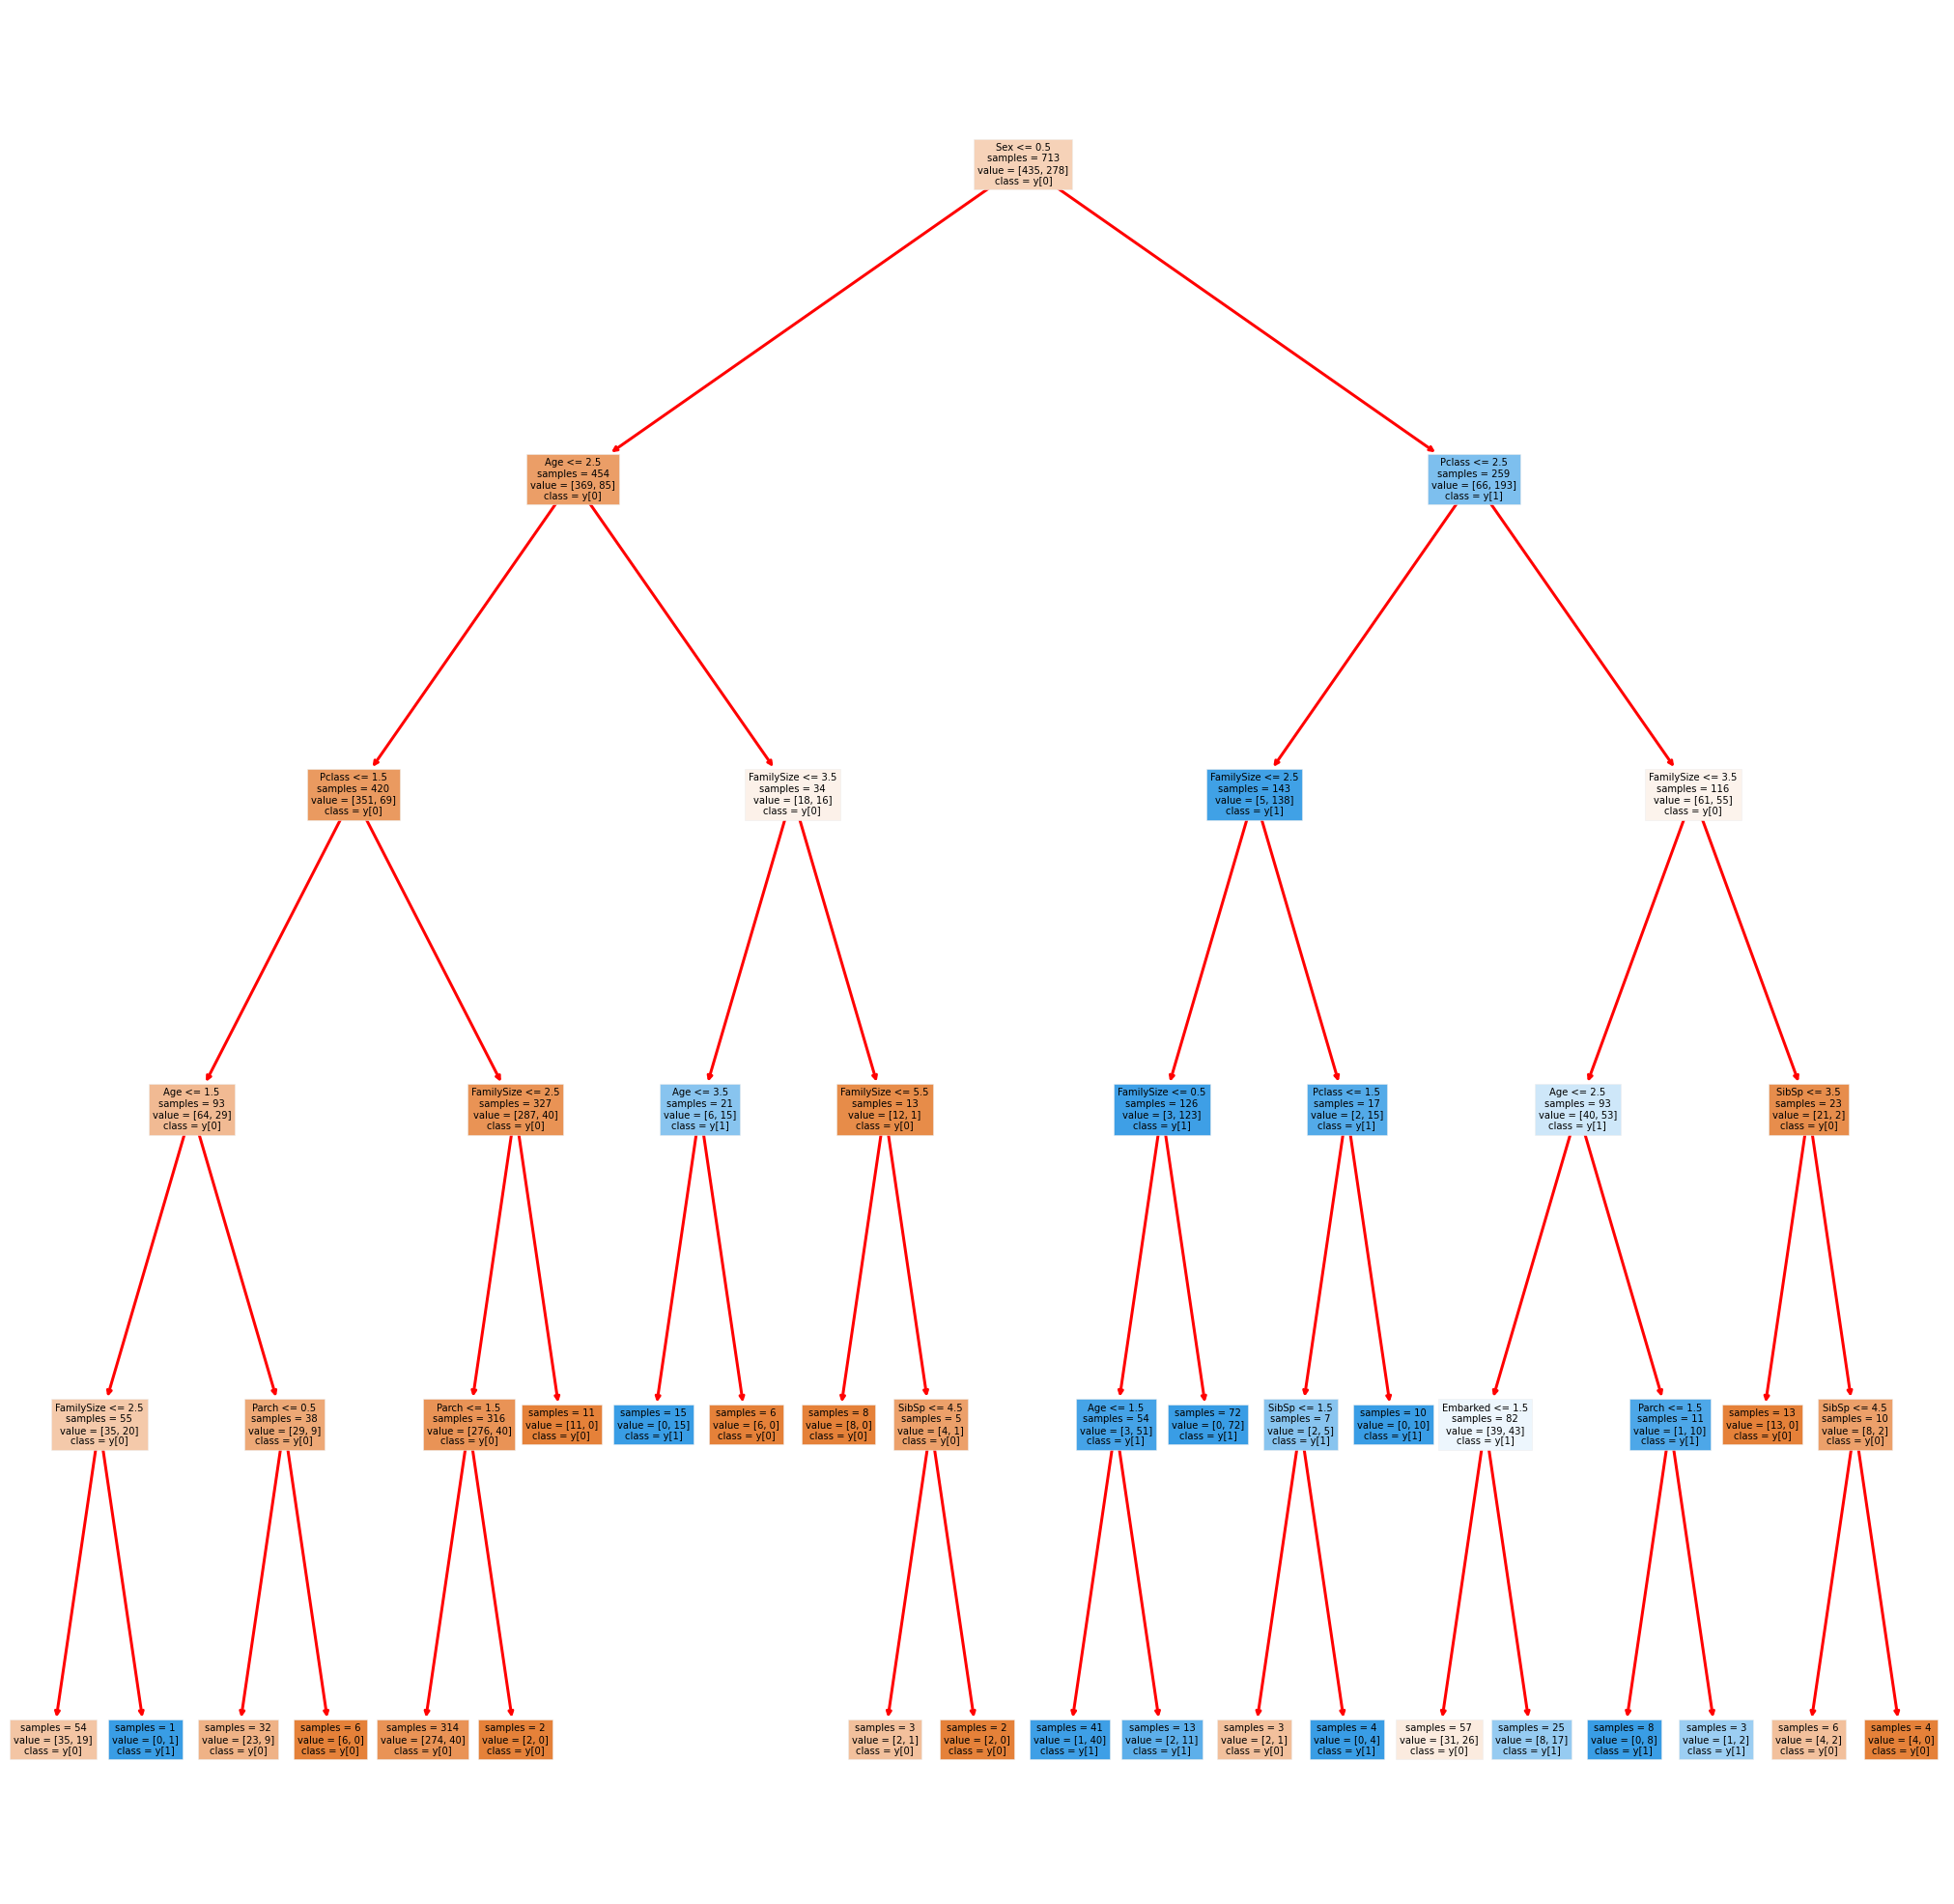

In [ ]:
# Creating a decision tree model
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

# Fitting the model on the train data
clf = clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize = (36, 36))

out = tree.plot_tree(clf, fontsize = 10, max_depth = 5, impurity = False, filled = True, feature_names = ['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize', 'Parch', 'SibSp'], class_names = True)

for o in out:
    
    arrow = o.arrow_patch
    
    if arrow is not None:
        
        arrow.set_edgecolor('red')
        
        arrow.set_linewidth(3)

# Display the plot       
plt.show()

**Observations:**
- The first split is based on the sex of the passenger. It is one of the most important factors while figuring out who survived, as we can see that in the leaves, more females survived in comparison to males. This might be because females were rescued first.
- We can see that among females, more from the first class and second class passengers survived in comparison to passengers who were traveling in the 3rd class.
- For males, age is an important factor. There is only one passenger younger than 25 years of age who survived.

Note: Blue means survived = 1 and orange means survived = 0.

Now, let's visualize and compare the error on the train data and the test data for different values of max_depth in the decision tree classifier.

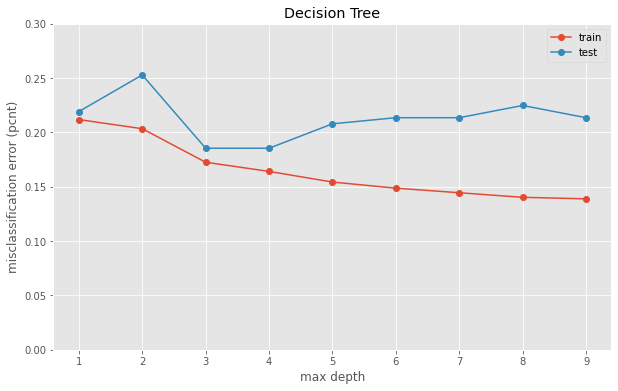

In [ ]:
train_scores = []

test_scores = []

for depth in range(1, 10):
    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
    
    clf = clf.fit(X_train, y_train)
    
    train_scores.append(1 - clf.score(X_train, y_train))
    
    test_scores.append(1 - clf.score(X_test, y_test))

plt.plot(range(1, 10), train_scores, '-o', label = "train")

plt.plot(range(1, 10), test_scores, '-o', label = "test")

plt.legend(loc = 'best')

plt.xlabel('max depth')

plt.ylabel('misclassification error (pcnt)')

# Setting the range of the Y-axis
plt.ylim(0, 0.3)

plt.title(f"Decision Tree")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

In [ ]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

**Observations:**
- The max_depth = 4 seems like the "sweet spot" where training and testing errors are balanced.

Now, let's see what would be the train and the test error for the same values of max_depth in a Random Forest Classifier.

In [ ]:
model_performance_classification(clf, X_test, y_test)

,Precision,Recall,Accuracy
0,0.80332,0.786732,0.814607


## **Random Forest**

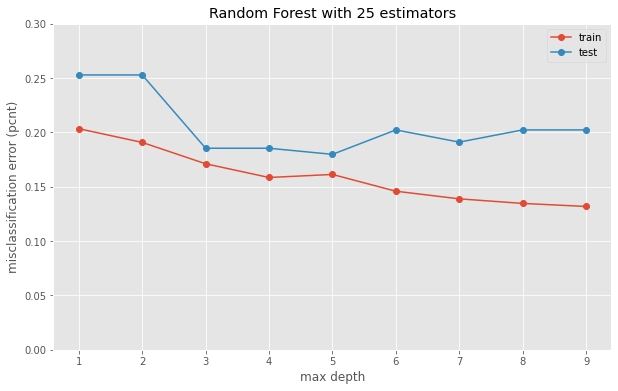

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_scores = []

test_scores = []

for depth in range(1, 10):
    
    clf = RandomForestClassifier(random_state = 0, criterion = 'entropy', max_depth = depth, n_estimators = 25)
    
    clf = clf.fit(X_train, y_train)
    
    train_scores.append(1 - clf.score(X_train, y_train))
    
    test_scores.append(1 - clf.score(X_test, y_test))

plt.plot(range(1, 10), train_scores, '-o', label = "train")

plt.plot(range(1, 10), test_scores, '-o', label = "test")

plt.legend(loc = 'upper right')

plt.xlabel('max depth')

plt.ylim(0, 0.3)

plt.ylabel('misclassification error (pcnt)')

plt.title(f"Random Forest with 25 estimators")

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

**Observations:**
- The random forest is giving generalized results at max_depth = 6 which was overfitting for a single decision tree.

## **Conclusion**

- After data preprocessing, we visualized the decision tree classifier and interpreted the output. 
- We also compared the errors on the train and test sets to find the optimal value for the hyperparameter max_depth, which came out to be 3.
- We also observed that Random Forest gives more generalized results than a single decision tree for the sample value of max_depth. The optimal max_depth for Random Forest came out to be 6.
- Interested learners can go ahead and build the decision tree and the random forest model with optimal values of max_depth and make predictions on an unseen dataset, named "test_titanic.csv".
-

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.38, 1: 0.62}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.38, 1: 0.62}, random_state=1)

In [ ]:
# creating metric function
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted) # returns confusion matrix

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Rescued', 'Rescued'], yticklabels = ['Not Rescued', 'Rescued'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()


              precision    recall  f1-score   support

           0       0.87      0.91      0.89       435
           1       0.85      0.79      0.82       278

    accuracy                           0.86       713
   macro avg       0.86      0.85      0.86       713
weighted avg       0.86      0.86      0.86       713



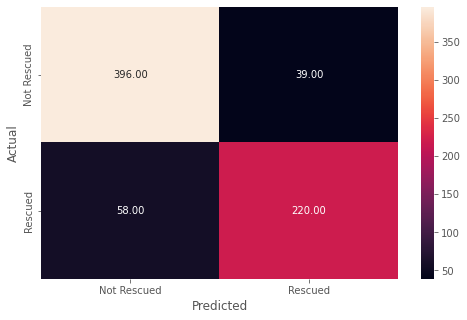

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       114
           1       0.77      0.62      0.69        64

    accuracy                           0.80       178
   macro avg       0.79      0.76      0.77       178
weighted avg       0.80      0.80      0.79       178



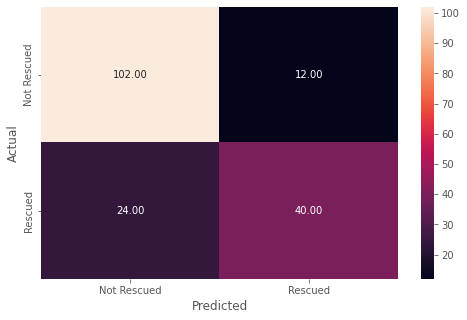

,Precision,Recall,Accuracy
0,0.789377,0.759868,0.797753


In [ ]:
# Model Performance on the test data
y_pred_test = clf.predict(X_test)
metrics_score(y_test, y_pred_test)
model_performance_classification(clf, X_test, y_test)

**Observations:**
- **We are getting an accuracy of about 80%** on the train and the test datasets.
- However, **the recall for this model is only around 66% for survivors on the test data and 79% on the train data.**
- As the recall is somewhat low, **this model may not perform very well** in differentiating out pasengers who had a high chance of surviving.
- As we can see from the Confusion Matrix, **this model is not great at identifying passengers who are most likely to survive.**

**Let's check the feature importance of the Random Forest**


In [ ]:
# importances = rf_estimator.feature_importances_
#
# columns = titanic_df[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']].columns
#
# importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
#
# plt.figure(figsize = (13, 13))
#
# sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- According to the Decision Tree, **Sex is the most important feature, followed by class, family size, then age.**

**Let's try to tune the model and check if we could improve the results.**


### **Tuning the Random Forest classifier**

**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [ ]:
# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.38, 1: 0.62}, random_state = 1)
# For tuning the model
from sklearn.model_selection import GridSearchCV

# Grid of parameters to choose from
params_rf = {
    "n_estimators": [100, 250, 500],
    "min_samples_leaf": np.arange(1, 4, 1),
    "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.38, 1: 0.62}, min_samples_leaf=3,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       435
           1       0.82      0.77      0.79       278

    accuracy                           0.84       713
   macro avg       0.84      0.83      0.83       713
weighted avg       0.84      0.84      0.84       713



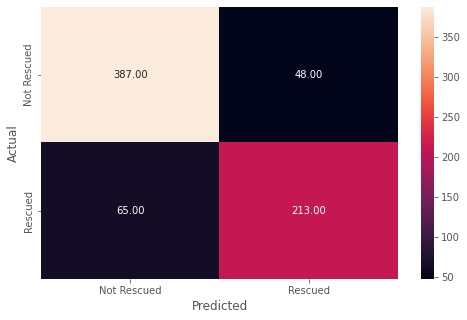

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       114
           1       0.78      0.70      0.74        64

    accuracy                           0.82       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



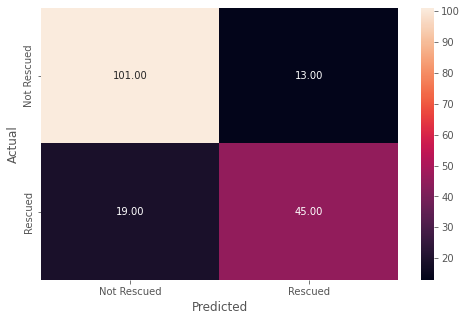

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

The recall is marginally better

In [ ]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, X_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.808764,0.794545,0.820225


Observations:
The tuned model is probably not overfitting the training dataset and shows a good performance on the test dataset!

The recall for class 1 has improved with a small decrease in precision.

This model is the best-performing one among all the models so far, and is giving us good precision and recall scores on the test dataset.

In [ ]:
# # Plotting feature importance
# importances = rf_estimator_tuned.feature_importances_

# columns = titanic_df[['Pclass', 'Sex', 'Age', 'Embarked', 'FamilySize']].columns

# importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# plt.figure(figsize = (13, 13))

# sns.barplot(importance_df.Importance, importance_df.index)

Nothing new

Let's now look at the other kind of Ensemble technique knowns as Boosting

### **XGBoost**
- XGBoost stands for Extreme Gradient Boosting.
- XGBoost is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms. It is widely utilized and routinely appears at the top of competition leader boards in data science.

In [ ]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [ ]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(X_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,X_test,y_test)


adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.807062,0.797971,0.820225


In [ ]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(X_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, X_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.820156,0.780839,0.820225


In [ ]:
X_train.info()

In [ ]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'error')

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,X_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.80625,0.76864,0.808989


In [ ]:
models_test_comp_df = pd.concat(

    [
        model_performance_classification(rf_estimator,X_test,y_test).T,
        rf_estimator_tuned_test.T, adaboost_model_perf_test.T,
        gbc_perf_test.T, xgb_perf_test.T
    ],

    axis=1,
)

models_test_comp_df.columns = [
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "Gradientboost classifier",
    "XGBoost classifier"
]

print("Test performance comparison:")


Test performance comparison:


In [ ]:
models_test_comp_df

,Random Forest classifier,Tuned Random Forest classifier,Adaboost classifier,Gradientboost classifier,XGBoost classifier
Precision,0.800179,0.808764,0.807062,0.820156,0.806250
Recall,0.775493,0.794545,0.797971,0.780839,0.768640
Accuracy,0.808989,0.820225,0.820225,0.820225,0.808989




```
# This is formatted as code
```

RF estimator tuned is the best

In [ ]:
test_data = pd.read_csv("test.csv")

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# Creating a new column
test_data['FamilySize'] = test_data['Parch'] + test_data['SibSp']

# Dropping un-necessary columns
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis = 1, inplace = True)

# Replacing the initials in the Embarked column with the full name
test_data.loc[titanic_df['Embarked'] == 'C', 'Embarked'] = 'Cherbourg'

test_data.loc[titanic_df['Embarked'] == 'S', 'Embarked'] = 'Southampton'

test_data.loc[titanic_df['Embarked'] == 'Q', 'Embarked'] = 'Queenstown'

# Binning the Age column
bins = [0, 13, 25, 40, 65, np.inf]

names = ['<13', '13-25', '25-40', '40-65', '65+']

test_data['Age'] = pd.cut(test_data['Age'], bins, labels = names)

# Printing 10 observations
test_data.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize
153,3,female,25-40,0,2,S,2
160,3,female,NaN,0,0,Q,0
54,2,male,NaN,0,0,C,0
393,2,male,40-65,0,0,S,0
10,3,male,NaN,0,0,S,0
364,1,female,13-25,1,0,C,1
347,3,female,25-40,0,0,C,0
102,3,male,NaN,0,0,Q,0
107,3,male,NaN,0,0,Q,0
219,3,male,NaN,0,0,S,0


In [ ]:
X_train.info()

In [ ]:
# Encoding the categorical columns
test_data.Sex = pd.factorize(test_data.Sex)[0]

test_data.Embarked = pd.factorize(test_data.Embarked)[0]

test_data.Age = pd.factorize(test_data.Age)[0]

test_data.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize
86,3,1,0,0,0,0,0
27,3,0,2,0,0,2,0
8,3,1,2,0,0,2,0
180,2,0,0,0,0,1,0
281,3,0,3,1,1,1,2
259,3,0,2,0,0,1,0
126,3,0,2,0,0,1,0
398,3,0,2,0,0,1,0
95,3,0,2,0,0,1,0
11,1,0,1,0,0,1,0


In [ ]:
#preds = gbc.predict(test_data)
# preds=adaboost_model.predict(test_data)
preds = clf.predict(test_data)

In [ ]:

preds[0:5]

In [ ]:
pd.DataFrame(preds)

In [ ]:
out = pd.DataFrame(preds)

In [ ]:
ids=np.arange(892, 1310)

In [ ]:
out.insert(0,"PassengerId",ids)

In [ ]:
out

In [ ]:
csv = out.to_csv

In [ ]:
from pathlib import Path

In [ ]:
filepath = Path('out.csv')

In [ ]:
csv = out.to_csv(filepath, header = ["PassengerId","Survived"], index=False)

# Attempt 2:

Some more algorithms and k-folds:

In [ ]:
import pandas
from pandas import read_csv
from pandas import set_option
#from pandas import tools
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
from sklearn import linear_model, discriminant_analysis, neighbors, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
models = []
models.append(('LR', LogisticRegression())), models.append(('LDA', LinearDiscriminantAnalysis())), models.append(('KNN', KNeighborsClassifier())), models.append(('CART', DecisionTreeClassifier())), models.append(('NB', GaussianNB())), models.append(('SVM', SVC()))

(None, None, None, None, None, None)

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.792351 (0.054943)
LDA: 0.790904 (0.059140)
KNN: 0.775509 (0.061970)
CART: 0.796635 (0.048820)
NB: 0.755829 (0.066580)
SVM: 0.825978 (0.050341)


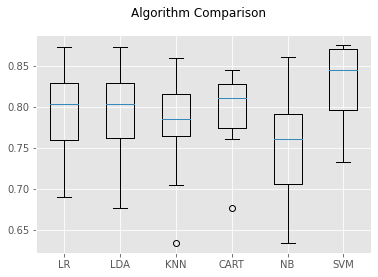

In [ ]:
from matplotlib import pyplot
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

It looks like SVM is the highest performer

In [ ]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.795149 (0.054787)
ScaledLDA: 0.790904 (0.059140)
ScaledKNN: 0.797887 (0.064905)
ScaledCART: 0.798044 (0.048797)
ScaledNB: 0.755829 (0.066580)
ScaledSVM: 0.816178 (0.053498)


We can see that SVM is slightly worse on the scaled data and KNN is slightly better.

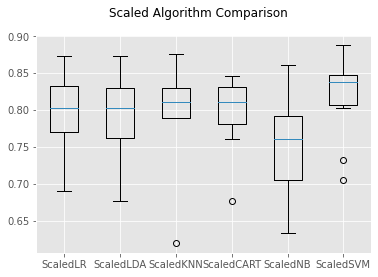

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

SVM is still the best

The results suggest digging deeper into the SVM algorithm. It is very likely that configuration beyond the default may yield even more accurate models.

We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the margin) and the type of kernel.

The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0.

We will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and more than 1.0 respectively).


In [ ]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.819014 using {'C': 1.5, 'kernel': 'rbf'}
0.788087 (0.061835) with: {'C': 0.1, 'kernel': 'linear'}
0.761541 (0.056025) with: {'C': 0.1, 'kernel': 'poly'}
0.807688 (0.062056) with: {'C': 0.1, 'kernel': 'rbf'}
0.776917 (0.062255) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.788087 (0.061835) with: {'C': 0.3, 'kernel': 'linear'}
0.775587 (0.046273) with: {'C': 0.3, 'kernel': 'poly'}
0.816119 (0.049770) with: {'C': 0.3, 'kernel': 'rbf'}
0.699844 (0.034951) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.788087 (0.061835) with: {'C': 0.5, 'kernel': 'linear'}
0.802230 (0.054374) with: {'C': 0.5, 'kernel': 'poly'}
0.810583 (0.042635) with: {'C': 0.5, 'kernel': 'rbf'}
0.694210 (0.038698) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.788087 (0.061835) with: {'C': 0.7, 'kernel': 'linear'}
0.803560 (0.045302) with: {'C': 0.7, 'kernel': 'poly'}
0.811972 (0.051112) with: {'C': 0.7, 'kernel': 'rbf'}
0.692821 (0.037895) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.788087 (0.061835) with: {'C': 0.9, 'kernel': 'linear'

We can try the same for unscaled

In [ ]:
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828795 using {'C': 1.5, 'kernel': 'rbf'}
0.788087 (0.061835) with: {'C': 0.1, 'kernel': 'linear'}
0.704069 (0.071353) with: {'C': 0.1, 'kernel': 'poly'}
0.800724 (0.045689) with: {'C': 0.1, 'kernel': 'rbf'}
0.706749 (0.064833) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.788087 (0.061835) with: {'C': 0.3, 'kernel': 'linear'}
0.701095 (0.072957) with: {'C': 0.3, 'kernel': 'poly'}
0.823181 (0.051883) with: {'C': 0.3, 'kernel': 'rbf'}
0.667527 (0.044096) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.788087 (0.061835) with: {'C': 0.5, 'kernel': 'linear'}
0.729128 (0.072094) with: {'C': 0.5, 'kernel': 'poly'}
0.827387 (0.049468) with: {'C': 0.5, 'kernel': 'rbf'}
0.656377 (0.041065) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.788087 (0.061835) with: {'C': 0.7, 'kernel': 'linear'}
0.736092 (0.067261) with: {'C': 0.7, 'kernel': 'poly'}
0.827387 (0.049468) with: {'C': 0.7, 'kernel': 'rbf'}
0.658979 (0.056309) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.788087 (0.061835) with: {'C': 0.9, 'kernel': 'linear'

The best performance was attained with unscaled X, C=1.5 and the rbf kernel

Another way that we can improve the performance of algorithms is by using ensemble methods. I will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods.

We will use the same test harness as before, 10-fold cross validation. No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are less sensitive to data distributions.

In [ ]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


AB: 0.806318 (0.051105)
GBM: 0.817606 (0.044738)
RF: 0.802230 (0.061130)
ET: 0.799413 (0.045050)


We can see that both boosting techniques provide strong accuracy scores in the low 80s (%) with default configurations. We can plot the distribution of accuracy scores across the cross validation folds.

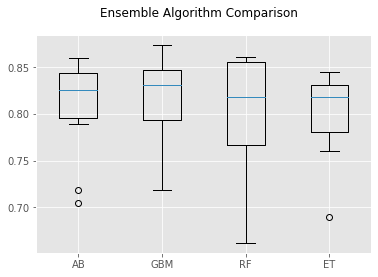

In [ ]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The SVM showed the most promise as a low complexity and stable model for this problem. I will finalize the model by training it on the entire training dataset and make predictions for the hold-out validation dataset to confirm my findings.


In [ ]:
model = SVC(C=1.5)
model.fit(X_train, y_train)
# estimate accuracy on validation dataset
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8033707865168539


In [ ]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[102  12]
 [ 23  41]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       114
           1       0.77      0.64      0.70        64

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.80      0.80      0.80       178



In [ ]:
preds = model.predict(test_data)

This yielded an accuracy score of .777 on Kaggle

Lets try all that again with LOOCV

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
    loocv = LeaveOneOut()
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    #print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.792351 (0.054943)
LDA: 0.790904 (0.059140)
KNN: 0.775509 (0.061970)
CART: 0.796635 (0.052370)
NB: 0.755829 (0.066580)
SVM: 0.825978 (0.050341)


SVM is definitely the best on unscaled.

In [ ]:
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=LeaveOneOut())
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.827489 using {'C': 0.3, 'kernel': 'rbf'}
0.788219 (0.408571) with: {'C': 0.1, 'kernel': 'linear'}
0.762973 (0.425259) with: {'C': 0.1, 'kernel': 'poly'}
0.809257 (0.392887) with: {'C': 0.1, 'kernel': 'rbf'}
0.771388 (0.419938) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.788219 (0.408571) with: {'C': 0.3, 'kernel': 'linear'}
0.779804 (0.414379) with: {'C': 0.3, 'kernel': 'poly'}
0.827489 (0.377824) with: {'C': 0.3, 'kernel': 'rbf'}
0.705470 (0.455831) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.788219 (0.408571) with: {'C': 0.5, 'kernel': 'linear'}
0.800842 (0.399367) with: {'C': 0.5, 'kernel': 'poly'}
0.823282 (0.381430) with: {'C': 0.5, 'kernel': 'rbf'}
0.701262 (0.457705) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.788219 (0.408571) with: {'C': 0.7, 'kernel': 'linear'}
0.813464 (0.389538) with: {'C': 0.7, 'kernel': 'poly'}
0.809257 (0.392887) with: {'C': 0.7, 'kernel': 'rbf'}
0.705470 (0.455831) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.788219 (0.408571) with: {'C': 0.9, 'kernel': 'linear'

In [ ]:
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830295 using {'C': 0.5, 'kernel': 'rbf'}
0.788219 (0.408571) with: {'C': 0.1, 'kernel': 'linear'}
0.697055 (0.459532) with: {'C': 0.1, 'kernel': 'poly'}
0.816269 (0.387264) with: {'C': 0.1, 'kernel': 'rbf'}
0.734923 (0.441374) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.788219 (0.408571) with: {'C': 0.3, 'kernel': 'linear'}
0.708275 (0.454556) with: {'C': 0.3, 'kernel': 'poly'}
0.828892 (0.376603) with: {'C': 0.3, 'kernel': 'rbf'}
0.673212 (0.469039) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.788219 (0.408571) with: {'C': 0.5, 'kernel': 'linear'}
0.708275 (0.454556) with: {'C': 0.5, 'kernel': 'poly'}
0.830295 (0.375374) with: {'C': 0.5, 'kernel': 'rbf'}
0.666199 (0.471570) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.788219 (0.408571) with: {'C': 0.7, 'kernel': 'linear'}
0.753156 (0.431175) with: {'C': 0.7, 'kernel': 'poly'}
0.826087 (0.379035) with: {'C': 0.7, 'kernel': 'rbf'}
0.647966 (0.477604) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.788219 (0.408571) with: {'C': 0.9, 'kernel': 'linear'

For scaled x, SVC with rbf and C=0.3 yields an accuracy of 82.7% on the training data (6 minutes). For unscaled x, we get 83.0% with C=0.5 and rbf kernel.

Lets try some ensembles.

In [ ]:
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(C=0.5)
estimators.append(('svm', model3))
estimators.append(('xgb', xgb))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train, y_train, cv=loocv)
print(results.mean())

0.8316970546984572


We can check with log

In [ ]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [ ]:
model_performance_classification(model3, X_test, y_test)

,Precision,Recall,Accuracy
0,0.794792,0.767681,0.803371


In [ ]:
model3.fit(X_train, y_train)

SVC()

In [ ]:
preds = model3.predict(test_data)

In [ ]:
out = pd.DataFrame(preds)

In [ ]:
ids=np.arange(892, 1310)

out.insert(0,"PassengerId",ids)


In [ ]:
from pathlib import Path

In [ ]:
filepath = Path('out.csv')


In [ ]:
csv = out.to_csv(filepath, header = ["PassengerId","Survived"], index=False)
